In [1]:
!nvidia-smi

Sun Apr 25 13:44:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# import CAPTCHA pkg

In [2]:
!rm -rf /content/sample_data
!pip install captcha

     |████████████████████████████████| 102kB 6.1MB/s 


In [3]:
import os
import time
import shutil
import random
import pandas as pd
import numpy as np
from tqdm import tqdm
from captcha.image import ImageCaptcha



class GenCAPTCHA:
    def __init__(self, length=4, cover_up=False, width=128, height=64, numbers=500, path='captcha'):
        self.length = length
        self.cover_up = cover_up
        self.width = width
        self.height = height
        self.numbers = numbers
        self.path = path

    def genVCode(self):
        code_list = [] 

        # 0-9
        for i in range(10): 
            code_list.append(str(i))

        if self.cover_up:
            # “A”到“Z”
            for i in range(65, 91): 
                code_list.append(chr(i))
       
        # “a”到“z”
        for i in range(97, 123): 
            code_list.append(chr(i))


        ''' 0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ
        import string
        characters = string.digits + string.ascii_uppercase
        print(characters)
        '''

        # 从 list 中随机获取 length 个元素，作为一个片断返回
        myslice = random.sample(code_list, self.length) 
        vcode = ''.join(myslice) # list to string
        return vcode

    def genLabel(self):
        data = pd.DataFrame(columns=['id','label'])
        for idx in (range(self.numbers)):
            data.loc[idx, 'id'] = idx
            vcode = self.genVCode()
            data.loc[idx, 'label'] = vcode
        return data

    
    def genIMG(self):
        path = self.path
        isExists=os.path.exists(path)
        if isExists:
            shutil.rmtree(path)
            os.mkdir(path)
            os.mkdir(path + '/images')
        else:
            os.mkdir(path)
            os.mkdir(path + '/images')
        
        image = ImageCaptcha(width=self.width, height=self.height)
        data = self.genLabel()        
        #data.to_csv(path + '/label.csv', index=False)     
        for id, label in tqdm(zip(data['id'], data['label'])):
            data = label
            image.write(data, path + '/images/{}.png'.format(label))

        print('')    
        print('--------------------------')
        print(' Generated CAPTCHA dataset ')
        print('--------------------------')

if __name__ == '__main__':
    dataset = GenCAPTCHA(length=5, cover_up=False, width=128, height=64, numbers=50000, path='dataset').genIMG()

50000it [05:23, 154.65it/s]


--------------------------
 Generated CAPTCHA dataset 
--------------------------


Number of images found:  49968
Shape of image:  (64, 128, 3)
Shape of image:  (64, 128, 3)
Shape of image:  (64, 128, 3)
Shape of image:  (64, 128, 3)


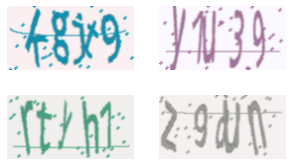

In [1]:
import os
import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split

# Path to the data directory
data_dir = Path("/content/dataset/images")

# Get list of all the images
images = list(data_dir.glob("*.png"))
print("Number of images found: ", len(images))

# Let's take a look at some samples first. 
# Always look at your data!
sample_images = images[:4]

_,ax = plt.subplots(2,2, figsize=(5,3))
for i in range(4):
    img = cv2.imread(str(sample_images[i]))
    print("Shape of image: ", img.shape)
    ax[i//2, i%2].imshow(img)
    ax[i//2, i%2].axis('off')
plt.show()

In [2]:
# Store all the characters in a set
characters = set()

# A list to store the length of each captcha
captcha_length = []

# Store image-label info
dataset = []

# Iterate over the dataset and store the
# information needed
for img_path in images:
    # 1. Get the label associated with each image
    label = img_path.name.split(".png")[0]
    # 2. Store the length of this cpatcha
    captcha_length.append(len(label))
    # 3. Store the image-label pair info
    dataset.append((str(img_path), label))
    
    # 4. Store the characters present
    for ch in label:
        characters.add(ch)

# Sort the characters        
characters = sorted(characters)

# Convert the dataset info into a dataframe
dataset = pd.DataFrame(dataset, columns=["img_path", "label"], index=None)

# Shuffle the dataset
dataset = dataset.sample(frac=1.).reset_index(drop=True)


print("Number of unqiue charcaters in the whole dataset: ", len(characters))
print("Maximum length of any captcha: ", max(Counter(captcha_length).keys()))
print("Characters present: ", characters)
print("Total number of samples in the dataset: ", len(dataset))

dataset.head()

Number of unqiue charcaters in the whole dataset:  36
Maximum length of any captcha:  5
Characters present:  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Total number of samples in the dataset:  49968


,img_path,label
0,/content/dataset/images/f54qw.png,f54qw
1,/content/dataset/images/eaq85.png,eaq85
2,/content/dataset/images/1j7vs.png,1j7vs
3,/content/dataset/images/3lz4g.png,3lz4g
4,/content/dataset/images/qk4ln.png,qk4ln


In [3]:
import os
import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.4.1


In [4]:
# Split the dataset into training and validation sets
training_data, validation_data = train_test_split(dataset, test_size=0.2, random_state=42)

training_data = training_data.reset_index(drop=True)
validation_data = validation_data.reset_index(drop=True)

print("Number of training samples: ", len(training_data))
print("Number of validation samples: ", len(validation_data))

Number of training samples:  39974
Number of validation samples:  9994


In [5]:
# Map text to numeric labels 
char_to_labels = {char:idx for idx, char in enumerate(characters)}

# Map numeric labels to text
labels_to_char = {val:key for key, val in char_to_labels.items()}

In [6]:
img_height, img_width = 64, 128

# Sanity check for corrupted images
def is_valid_captcha(captcha):
    for ch in captcha:
        if not ch in characters:
            return False
    return True

# Store arrays in memory as it's not a muvh big dataset
def generate_arrays(df, resize=True, img_height=64, img_width=128):
    """Generates image array and labels array from a dataframe.
    
    Args:
        df: dataframe from which we want to read the data
        resize (bool)    : whether to resize images or not
        img_weidth (int): width of the resized images
        img_height (int): height of the resized images
        
    Returns:
        images (ndarray): grayscale images
        labels (ndarray): corresponding encoded labels
    """
    
    num_items = len(df)
    images = np.zeros((num_items, img_height, img_width), dtype=np.float32)
    labels = [0]*num_items
    
    for i in range(num_items):
        img = cv2.imread(df["img_path"][i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        if resize: 
            img = cv2.resize(img, (img_width, img_height))
        
        img = (img/255.).astype(np.float32)
        label = df["label"][i]
        
        # Add only if it is a valid captcha
        if is_valid_captcha(label):
            images[i, :, :] = img
            labels[i] = label
    
    return images, np.array(labels)



# Build training data
training_data, training_labels = generate_arrays(df=training_data)
print("Number of training images: ", training_data.shape)
print("Number of training labels: ", training_labels.shape)


# Build validation data
validation_data, validation_labels = generate_arrays(df=validation_data)
print("Number of validation images: ", validation_data.shape)
print("Number of validation labels: ", validation_labels.shape)

Number of training images:  (39974, 64, 128)
Number of training labels:  (39974,)
Number of validation images:  (9994, 64, 128)
Number of validation labels:  (9994,)


In [7]:
from tensorflow.keras.utils import Sequence


class DataGenerator(Sequence):
    """Generates batches from a given dataset.
    
    Args:
        data: training or validation data
        labels: corresponding labels
        char_map: dictionary mapping char to labels
        batch_size: size of a single batch
        img_width: width of the resized
        img_height: height of the resized
        downsample_factor: by what factor did the CNN downsample the images
        max_length: maximum length of any captcha
        shuffle: whether to shuffle data or not after each epoch
    Returns:
        batch_inputs: a dictionary containing batch inputs 
        batch_labels: a batch of corresponding labels 
    """
    
    def __init__(self,
                 data,
                 labels,
                 char_map,
                 batch_size=128,
                 img_width=128,
                 img_height=64,
                 downsample_factor=4,
                 max_length=5,
                 shuffle=True
                ):
        self.data = data
        self.labels = labels
        self.char_map = char_map
        self.batch_size = batch_size
        self.img_width = img_width
        self.img_height = img_height
        self.downsample_factor = downsample_factor
        self.max_length = max_length
        self.shuffle = shuffle
        self.indices = np.arange(len(data))    
        self.on_epoch_end()
        
    def __len__(self):
        return int(np.ceil(len(self.data) / self.batch_size))
    
    def __getitem__(self, idx):
        # 1. Get the next batch indices
        curr_batch_idx = self.indices[idx*self.batch_size:(idx+1)*self.batch_size]
        
        # 2. This isn't necessary but it can help us save some memory
        # as not all batches the last batch may not have elements
        # equal to the batch_size 
        batch_len = len(curr_batch_idx)
        
        # 3. Instantiate batch arrays
        batch_images = np.ones((batch_len, self.img_width, self.img_height, 1),
                               dtype=np.float32)
        batch_labels = np.ones((batch_len, self.max_length), dtype=np.float32)
        input_length = np.ones((batch_len, 1), dtype=np.int64) * \
                                (self.img_width // self.downsample_factor - 2)
        label_length = np.zeros((batch_len, 1), dtype=np.int64)
        
        
        for j, idx in enumerate(curr_batch_idx):
            # 1. Get the image and transpose it
            img = self.data[idx].T
            # 2. Add extra dimenison
            img = np.expand_dims(img, axis=-1)
            # 3. Get the correpsonding label
            text = self.labels[idx]
            # 4. Include the pair only if the captcha is valid
            if is_valid_captcha(text):
                label = [self.char_map[ch] for ch in text]
                batch_images[j] = img
                batch_labels[j] = label
                label_length[j] = len(text)
        
        batch_inputs = {
                'input_data': batch_images,
                'input_label': batch_labels,
                'input_length': input_length,
                'label_length': label_length,
                }
        return batch_inputs, np.zeros(batch_len).astype(np.float32)
        
    
    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

In [8]:
# Batch size for training and validation
batch_size = 128

# Desired image dimensions
img_width=128
img_height=64 

# Factor  by which the image is going to be downsampled
# by the convolutional blocks
downsample_factor=4

# Maximum length of any captcha in the data
max_length=5

# Get a generator object for the training data
train_data_generator = DataGenerator(data=training_data,
                                     labels=training_labels,
                                     char_map=char_to_labels,
                                     batch_size=batch_size,
                                     img_width=img_width,
                                     img_height=img_height,
                                     downsample_factor=downsample_factor,
                                     max_length=max_length,
                                     shuffle=True
                                    )

# Get a generator object for the validation data 
valid_data_generator = DataGenerator(data=validation_data,
                                     labels=validation_labels,
                                     char_map=char_to_labels,
                                     batch_size=batch_size,
                                     img_width=img_width,
                                     img_height=img_height,
                                     downsample_factor=downsample_factor,
                                     max_length=max_length,
                                     shuffle=False
                                    )

In [9]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred, input_length, label_length):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)
        
        # On test time, just return the computed loss
        return loss

def build_model():
    # Inputs to the model
    input_img = layers.Input(shape=(img_width, img_height, 1),
                            name='input_data',
                            dtype='float32')
    labels = layers.Input(name='input_label', shape=[max_length], dtype='float32')
    input_length = layers.Input(name='input_length', shape=[1], dtype='int64')
    label_length = layers.Input(name='label_length', shape=[1], dtype='int64')
    
    # First conv block
    x = layers.Conv2D(32,
               (3,3),
               activation='relu',
               kernel_initializer='he_normal',
               padding='same',
               name='Conv1')(input_img)
    x = layers.MaxPooling2D((2,2), name='pool1')(x)
    
    # Second conv block
    x = layers.Conv2D(64,
               (3,3),
               activation='relu',
               kernel_initializer='he_normal',
               padding='same',
               name='Conv2')(x)
    x = layers.MaxPooling2D((2,2), name='pool2')(x)
    
    # We have used two max pool with pool size and strides of 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing it to RNNs
    new_shape = ((img_width // 4), (img_height // 4)*64)
    x = layers.Reshape(target_shape=new_shape, name='reshape')(x)
    x = layers.Dense(64, activation='relu', name='dense1')(x)
    x = layers.Dropout(0.2)(x)
    
    # RNNs
    x = layers.Bidirectional(layers.LSTM(128,
                                         return_sequences=True,
                                         dropout=0.2))(x)
    x = layers.Bidirectional(layers.LSTM(64,
                                         return_sequences=True,
                                         dropout=0.25))(x)
    
    # Predictions
    x = layers.Dense(len(characters)+1,
              activation='softmax', 
              name='dense2',
              kernel_initializer='he_normal')(x)
    
    # Calculate CTC
    output = CTCLayer(name='ctc_loss')(labels, x, input_length, label_length)
    
    # Define the model
    model = keras.models.Model(inputs=[input_img,
                                       labels,
                                       input_length,
                                       label_length],
                                outputs=output,
                                name='ocr_model_v1')
    
    # Optimizer
    optimizer=tf.keras.optimizers.Adam()
    
    # Compile the model and return 
    model.compile(optimizer=optimizer,metrics=['accuracy'])
    return model

In [10]:
model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_data (InputLayer)         [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 64, 32)  320         input_data[0][0]                 
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 64, 32, 32)   0           Conv1[0][0]                      
__________________________________________________________________________________________________
Conv2 (Conv2D)                  (None, 64, 32, 64)   18496       pool1[0][0]                      
_______________________________________________________________________________________

In [11]:
checkpoint_save_path = "./checkpoint/BaseCNN.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

In [ ]:
# Add early stopping
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   patience=500,
                                   restore_best_weights=True, ModelCheckpoint('ctc_best.h5', save_best_only=True))

# Train the model
history = model.fit(train_data_generator,
                    validation_data=valid_data_generator,
                    epochs=100,
                    callbacks=[es])

In [15]:
model.save('ctc.h5')

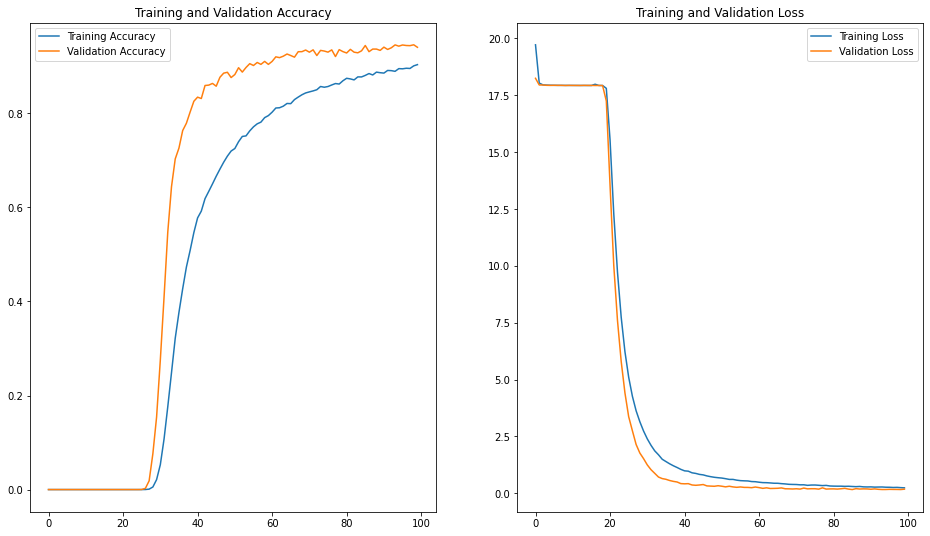

In [18]:
# Show acc and Loss curves for training and validation sets
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16,9))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_data (InputLayer)      [(None, 128, 64, 1)]      0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 128, 64, 32)       320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 64, 32, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 64, 32, 64)        18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 32, 16, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 32, 1024)          0         
_________________________________________________________________
dense1 (Dense)               (None, 32, 64)            6560

<Figure size 720x720 with 0 Axes>

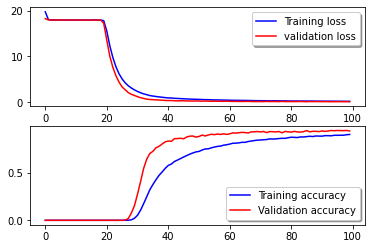

In [81]:

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)



#The input and output of each layer of the model are taken out for analysis
prediction_model = keras.models.Model(model.get_layer(name='input_data').input,
                                        model.get_layer(name='dense2').output)
prediction_model.summary()

In [16]:
# A utility to decode the output of the network
def decode_batch_predictions(pred):
    pred = pred[:, :-2]
    input_len = np.ones(pred.shape[0])*pred.shape[1]
    
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, 
                                        input_length=input_len,
                                        greedy=True)[0][0]
    
    # Iterate over the results and get back the text
    output_text = []
    for res in results.numpy():
        outstr = ''
        for c in res:
            if c < len(characters) and c >=0:
                outstr += labels_to_char[c]
        output_text.append(outstr)
    
    # return final text results 
    return output_text

In [85]:
#  Let's check results on some validation samples
for p, (inp_value, _) in enumerate(valid_data_generator):
    bs = inp_value['input_data'].shape[0]
    X_data = inp_value['input_data']
    labels = inp_value['input_label']
    
    preds = prediction_model.predict(X_data)
    
    pred_texts = decode_batch_predictions(preds)
    
    
    orig_texts = []
    for label in labels:
        text = ''.join([labels_to_char[int(x)] for x in label])
        orig_texts.append(text)
    
    for i in range(bs):
        print(f'Ground truth: {orig_texts[i]} \t Predicted: {pred_texts[i]}')
        #plt.imshow(X_data[0])
    break

Ground truth: z7ebx 	 Predicted: z7ebx
Ground truth: zbhmq 	 Predicted: zbhmq
Ground truth: owul1 	 Predicted: owul1
Ground truth: r3l2d 	 Predicted: r3l2d
Ground truth: i71kj 	 Predicted: i71kj
Ground truth: 1uo6e 	 Predicted: 1uo6e
Ground truth: 71uvx 	 Predicted: 71uvx
Ground truth: 0howx 	 Predicted: 0howx
Ground truth: ohrdw 	 Predicted: ohrdw
Ground truth: 8lnzo 	 Predicted: 8lnzo
Ground truth: 870ie 	 Predicted: 870ie
Ground truth: ts0o7 	 Predicted: ts07
Ground truth: 62xcn 	 Predicted: 62xcn
Ground truth: ukjyp 	 Predicted: ukjyp
Ground truth: pyoh3 	 Predicted: pyoh3
Ground truth: b6u7a 	 Predicted: b6u7a
Ground truth: 7pw0e 	 Predicted: 7pw0e
Ground truth: fejk7 	 Predicted: fejk7
Ground truth: z57xn 	 Predicted: z57xn
Ground truth: mqwri 	 Predicted: mqwri
Ground truth: rhsx0 	 Predicted: rhsx0
Ground truth: vkzqh 	 Predicted: vkzqh
Ground truth: l2fki 	 Predicted: l2fki
Ground truth: wjt5d 	 Predicted: wjt5d
Ground truth: ypgxz 	 Predicted: ypgxz
Ground truth: fzobs 	 Pred

In [ ]:
!pip install -U git+https://github.com/cleverhans-lab/cleverhans.git#egg=cleverhans

In [52]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from absl import app, flags
from easydict import EasyDict
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D

from cleverhans.tf2.attacks.projected_gradient_descent import projected_gradient_descent
from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method

FLAGS = flags.FLAGS

In [ ]:
flags.DEFINE_integer("nb_epochs", 8, "Number of epochs.")
flags.DEFINE_float("eps", 0.3, "Total epsilon for FGM and PGD attacks.")
flags.DEFINE_bool(
    "adv_train", False, "Use adversarial training (on PGD adversarial examples)."
)
flags.DEFINE_enum("model", "cnn", ["cnn", "pynet"], "Choose model type.")

In [93]:
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_fgsm = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()

# Evaluate on clean and adversarial data
progress_bar_test = tf.keras.utils.Progbar(10000)
for x, y in valid_data_generator:
    y_pred = prediction_model.predict(x)
    # print(y)
    # print(y_pred)
    # break
    test_acc_clean(y, y_pred)

    x_fgm = fast_gradient_method(prediction_model, x, FLAGS.eps, np.inf)
    y_pred_fgm = prediction_model.predict(x_fgm)
    test_acc_fgsm(y, y_pred_fgm)

    x_pgd = projected_gradient_descent(prediction_model, x, FLAGS.eps, 0.01, 40, np.inf)
    y_pred_pgd = prediction_model.predict(x_pgd)
    test_acc_pgd(y, y_pred_pgd)

    progress_bar_test.add(x.shape[0])

print(
    "test acc on clean examples (%): {:.3f}".format(test_acc_clean.result() * 100)
)
print(
    "test acc on FGM adversarial examples (%): {:.3f}".format(
        test_acc_fgsm.result() * 100
    )
)
print(
    "test acc on PGD adversarial examples (%): {:.3f}".format(
        test_acc_pgd.result() * 100
    )
)

InvalidArgumentError: ignored